In [869]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [870]:
from sklearn.datasets import fetch_openml

In [871]:
machine_cpu = fetch_openml(name='machine_cpu', as_frame=True)

/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [872]:
type(machine_cpu)

sklearn.utils._bunch.Bunch

In [873]:
machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

In [874]:
display(machine_cpu.data.shape, machine_cpu.data.head())

(209, 6)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125.0,256.0,6000.0,256.0,16.0,128.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0


In [875]:
machine_cpu.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MYCT    209 non-null    float64
 1   MMIN    209 non-null    float64
 2   MMAX    209 non-null    float64
 3   CACH    209 non-null    float64
 4   CHMIN   209 non-null    float64
 5   CHMAX   209 non-null    float64
dtypes: float64(6)
memory usage: 9.9 KB


In [876]:
machine_cpu.data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000


In [877]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [878]:
machine_cpu.feature_names

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']

### EDA

In [879]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(machine_cpu.data, machine_cpu.target, test_size=0.2, random_state=42)

display(X_train.shape, X_test.shape)

(167, 6)

(42, 6)

In [880]:
machine_cpu.target

0      198.0
1      269.0
2      220.0
3      172.0
4      132.0
       ...  
204     42.0
205     46.0
206     52.0
207     67.0
208     45.0
Name: class, Length: 209, dtype: float64

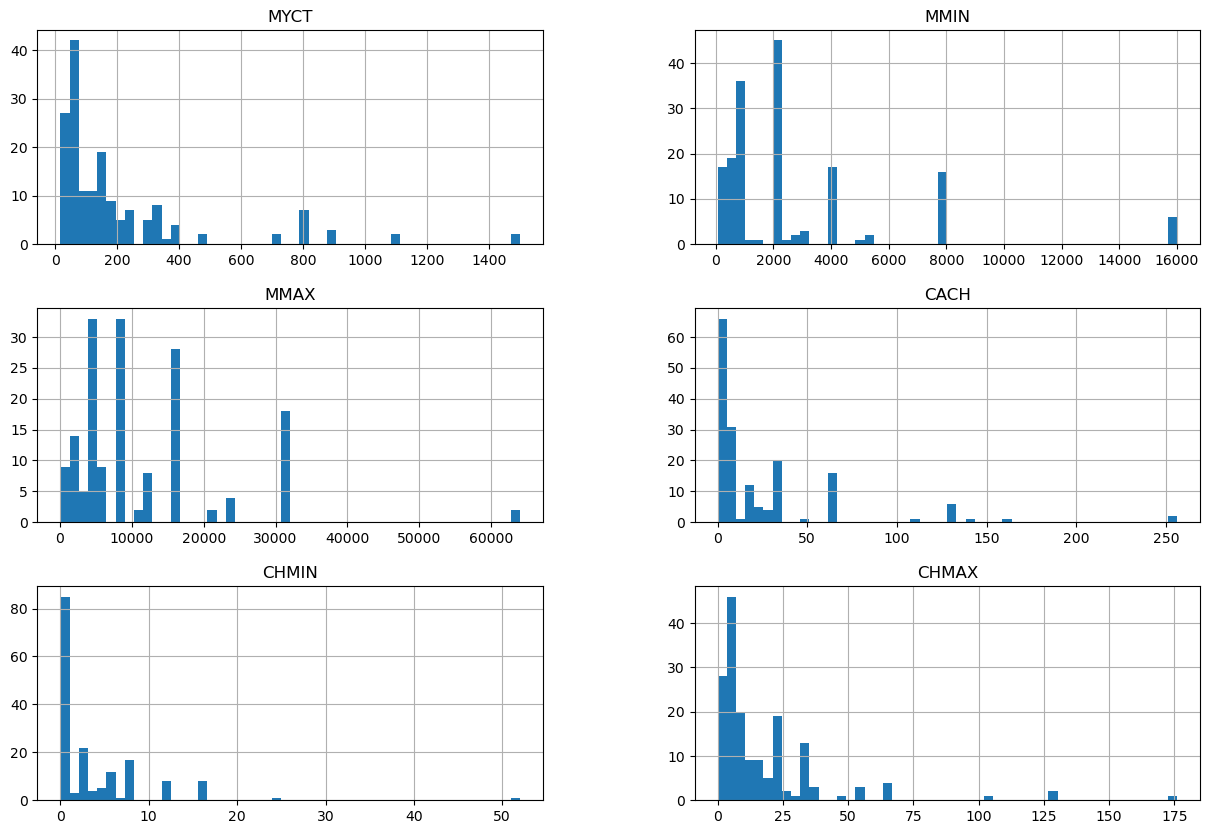

In [881]:
X_train.hist(bins=50, figsize=(15, 10))
plt.show()

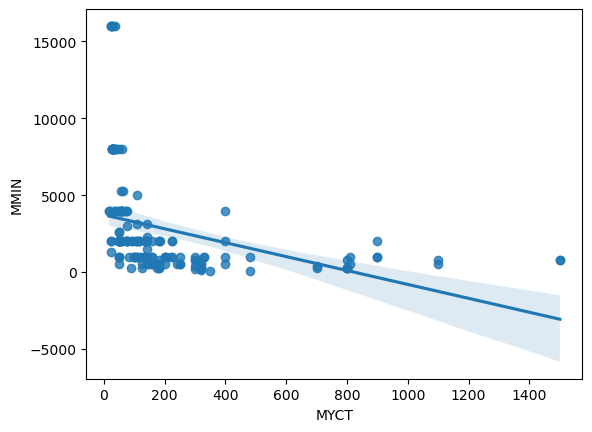

In [882]:
sns.regplot(x='MYCT', y='MMIN', data=X_train)
plt.show()

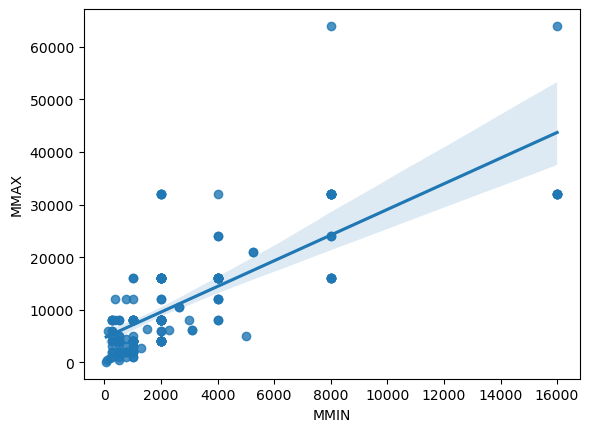

In [883]:
sns.regplot(x='MMIN', y='MMAX', data=X_train)
plt.show()

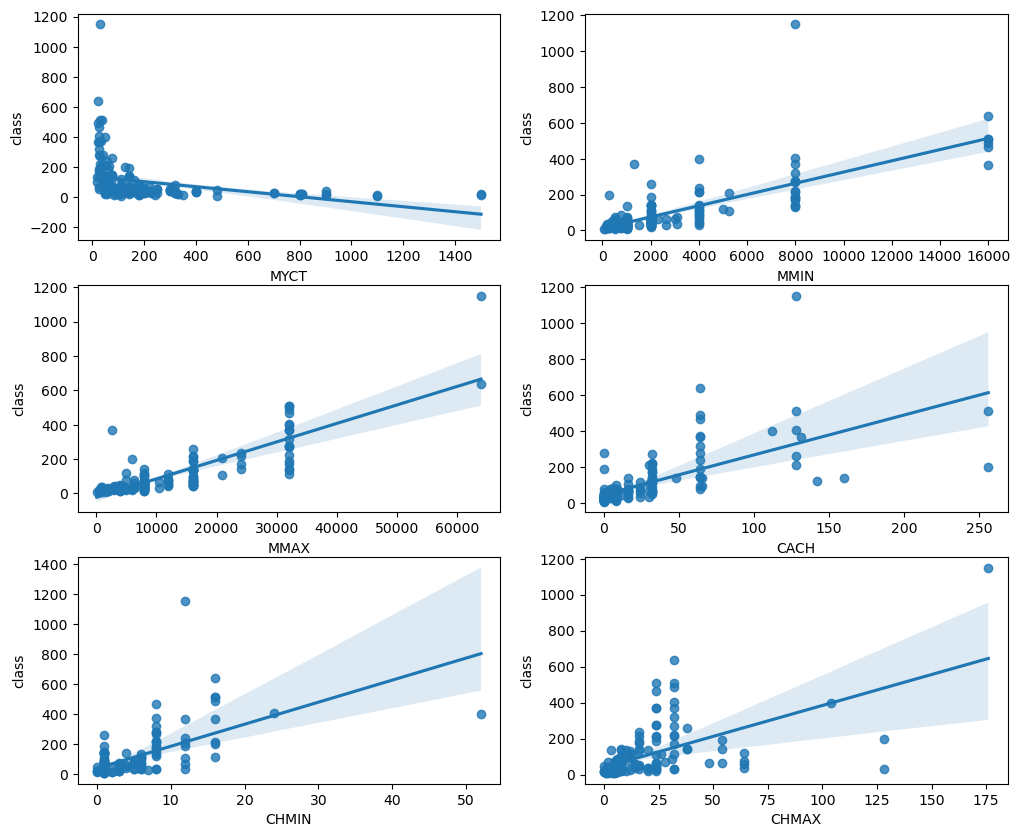

In [884]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

for i, col in enumerate(X_train.columns):
    sns.regplot(x=col, y=y_train, data=X_train, ax=ax[i//2][i%2])

plt.show()


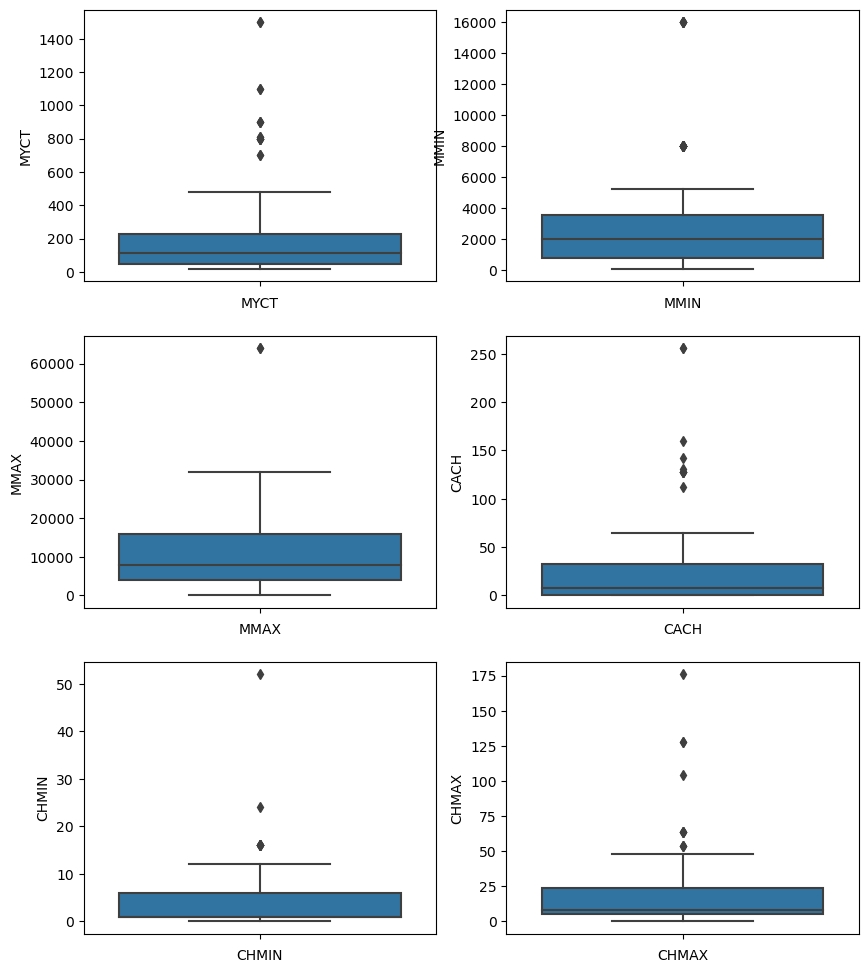

In [885]:
# use sns facetgrid to plot a distribution plot for each feature
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
ax = ax.flatten()

for i, col in enumerate(X_train.columns):
    sns.boxplot(data=X_train, y=col, ax=ax[i])
    ax[i].set_xlabel(col)

plt.show()

### Outlier Detection and Removal

In [886]:
def handle_outliers_std(data, column):
    data_mean = data[column].mean()
    data_std = data[column].std()
    cut_off = data_std * 3

    lower = data_mean - cut_off
    upper = data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    print('{}'.format(column))
    print('Identified outliers: %d' % len(outliers))
    
    outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

    print('\n')
    outliers_removed = data.loc[~data[column].isin(outliers)]

    return outliers_removed
    

In [887]:
X_train_copy = X_train.copy()
X_train_out_rem = handle_outliers_std(X_train_copy, 'MYCT')
X_train_out_rem = handle_outliers_std(X_train_out_rem, 'MMIN')
X_train_out_rem = handle_outliers_std(X_train_out_rem, 'MMAX')
X_train_out_rem = handle_outliers_std(X_train_out_rem, 'CACH')
X_train_out_rem = handle_outliers_std(X_train_out_rem, 'CHMIN')
X_train_out_rem = handle_outliers_std(X_train_out_rem, 'CHMAX')

MYCT
Identified outliers: 4
Non-outlier observations: 163


MMIN
Identified outliers: 6
Non-outlier observations: 157


MMAX
Identified outliers: 1
Non-outlier observations: 156


CACH
Identified outliers: 4
Non-outlier observations: 152


CHMIN
Identified outliers: 2
Non-outlier observations: 150


CHMAX
Identified outliers: 1
Non-outlier observations: 149




In [888]:
X_test_copy = X_test.copy()
X_test_out_rem = handle_outliers_std(X_test_copy, 'MYCT')
X_test_out_rem = handle_outliers_std(X_test_out_rem, 'MMIN')
X_test_out_rem = handle_outliers_std(X_test_out_rem, 'MMAX')
X_test_out_rem = handle_outliers_std(X_test_out_rem, 'CACH')
X_test_out_rem = handle_outliers_std(X_test_out_rem, 'CHMIN')
X_test_out_rem = handle_outliers_std(X_test_out_rem, 'CHMAX')

MYCT
Identified outliers: 2
Non-outlier observations: 40


MMIN
Identified outliers: 1
Non-outlier observations: 39


MMAX
Identified outliers: 1
Non-outlier observations: 38


CACH
Identified outliers: 1
Non-outlier observations: 37


CHMIN
Identified outliers: 1
Non-outlier observations: 36


CHMAX
Identified outliers: 1
Non-outlier observations: 35




In [889]:
### make the target varriable fit the df_train_out_rem
y_train_out_rem = y_train.loc[y_train.index.isin(X_train_out_rem.index)]
y_test_out_rem = y_test.loc[y_test.index.isin(X_test_out_rem.index)]

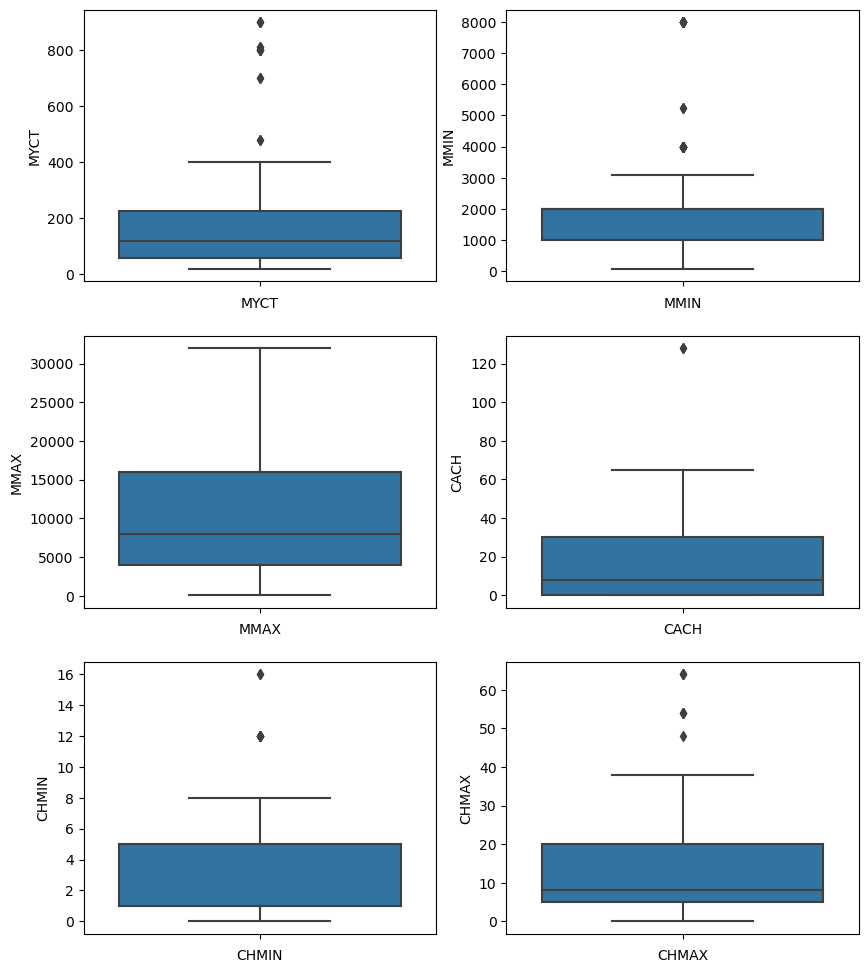

In [890]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
ax = ax.flatten()

for i, col in enumerate(X_train_out_rem.columns):
    sns.boxplot(data=X_train_out_rem, y=col, ax=ax[i])
    ax[i].set_xlabel(col)

plt.show()

## Data Preprocessing

In [891]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train_out_rem)

## Modelling

### Decision Tree

In [892]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_out_rem, y_train_out_rem)

DecisionTreeRegressor()

In [893]:
dt_scaled = DecisionTreeRegressor()
dt_scaled.fit(X_train_scaled, y_train_out_rem)

DecisionTreeRegressor()

In [894]:
from sklearn.metrics import mean_squared_error

def predict(input, model, labels):
    preds = model.predict(input)
    mse = mean_squared_error(labels, preds)
    rmse = np.sqrt(mse)
    return rmse

In [895]:
predict(X_train_out_rem, dt, y_train_out_rem)

6.6726762622742735

In [896]:
predict(X_train_scaled, dt_scaled, y_train_out_rem)

6.6726762622742735

## HyperParam Tuning Decision Tree

In [897]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [898]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4, 5], 
              'max_depth':[None, 1, 2, 3, 4, 5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(X_train_out_rem, y_train_out_rem)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [899]:
grid_search.best_params_

{'max_depth': None, 'max_leaf_nodes': 8, 'min_samples_split': 2}

In [900]:
tree_best = grid_search.best_estimator_

In [901]:
predict(X_train_out_rem, tree_best, y_train_out_rem)

26.381767300965837

In [902]:
predict(X_test_out_rem, tree_best, y_test_out_rem)

39.13712675127044

<b>Observation:</b>
<p>The model overfitted. The model is too complex for the data size that we have. Decision trees have a tendency to overfit the data.</p>